# 次元削減でデータを圧縮する
- 特徴選択に代わる次元削減のもう一つの方法は、特徴抽出である。
- 特徴抽出では、データを変換し、元の次元よりも低い次元の新しい特徴部分空間を作成するものである。
- 紹介されるの以下の３つ

１．教師なしデータ圧縮での主成分分析
２．クラスの分離を最大化する教師あり次元削減法としての線形判別分析
３．カーネル主成分分析による非線形次元削減

# 5.1 主成分分析(PCA)による教師なし削減
- 特徴抽出では、データが新しい特徴空間に変換または射影される。次元削減では、データに含まれる情報の大部分を維持することを目標としたデータ圧縮の手段として捉えられる。
- 一般に特徴抽出は計算効率を改善するために使用される。
- PCAは特徴量同士の相関関係に基づいてデータからパターンを抽出するのに役立つ。
- PCAの目的は、高次元データにおいて分散が最大となる方向を見つけ出し、元の次元と同じか低い次元の新しい部分空間へ射影することである。
- 新しい特徴量軸が互いに直行するという制約があるとすれば、新しい部分空間の直行軸（主成分）を分散が最大となる方向とみなすことができる。
- PCAを次元削減に使用する場合はd×k次元の変換行列$\vec{W}$を作成する。これにより、サンプルベクトル$\vec{x}$を、新しいk次元の特徴部分空間に写像できる
$$ \vec{x} = [x_{1},x_{2},\cdots,x_{d}], \, \vec{x} \in \mathbb{R}^{d}$$
$$↓\vec{x} \vec{W} , \, \vec{W} \in \mathbb{R}^{d \times k}$$
$$\vec{z} = [z_{1},z_{2},\cdots,z_{k}], \, \vec{z} \in \mathbb{R}^{k}$$

- 元のd次元のデータを新しいk次元の部分空間に変換すると、最初の主成分の分散は最大となる
- PCAの方向はデータセットのスケーリングに対して非常に敏感であるので、標準化すること。
- PCAアルゴリズムのスッテプは以下の通り。

１．d次元のデータ・セットを標準化する

２．標準化したデータセットの共分散行列を作成する

３．共分散行列を固有ベクトルと固有値に分解する

４．最っとも大きいk個の固有値に対応するk個の固有ベクトルを選択する。この場合のkは新しい特徴部分空間の次元数を表す($k \le d$)

５．上位k個の固有ベクトルから射影行列Wを作成する

６．射影行列$\vec{W}$を使ってd次元の入力データ・セット$\vec{X}$を変換し、新しいk次元の特徴部分空間を取得する。

# 5.1.1 共分散行列の固有対を求める。
- はじめの4ステップを実行する

In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

#2列目以降のデータをXに、１列目のデータをyに格納
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
#トレーニングデータとテストデータに分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#標準化
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

- d×d次元の共分散行列は、特徴量のペアごとの共分散を保持する。
$$\sigma_{jk} = \frac{1}{n} \sum^{n}_{i=1} (x^{(i)}_{j} - \mu_{j})(x^{(i)}_{k} - \mu_{k})$$
- ２つの特徴量の間の共分散が正の場合は、それらの特徴量がともに増加または減少することを表し、負の場合は、それらの特徴量が反対方向に変化することを表す。
$$\Sigma = \begin{bmatrix} \sigma^{2}_{1} & \sigma^{2}_{12} & \sigma^{2}_{13} \\ \sigma^{2}_{21} & \sigma^{2}_{2} & \sigma^{2}_{23} \\ \sigma^{2}_{31} & \sigma^{2}_{32} & \sigma^{2}_{3} \end{bmatrix} $$

- 共分散行列の固有ベクトルが主成分（分散が最大となる方向を表すのに対して、対応する固有値はそれらの大きさを定義する。
- wineデータセットの場合は、13×13の共分散行列から13個の固有値ベクトルと固有値が得られる
- 固有ベクトル$\vec{\nu}$は以下の条件を満たす
$$\Sigma \vec{\nu} = \lambda \vec{\nu}$$

- $\lambda$はスカラー（固有値）である。

In [2]:
import numpy as np
#共分散行列を作成
cov_mat = np.cov(X_train_std.T)
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)
print '\nEigenvalues \n%s' %eigen_vals


Eigenvalues 
[ 4.8923083   2.46635032  1.42809973  1.01233462  0.84906459  0.60181514
  0.52251546  0.33051429  0.08414846  0.29595018  0.16831254  0.21432212
  0.2399553 ]


- データ・セットを新しい特徴部分空間に圧縮し、次元を削減するためにデータに含まれる大半の情報（分散）を含んでいる固有ベクトル（主成分）だけを選択する。
- 固有値は固有ベクトルの大きさを表すため、降順で並び替える。
- 関心があるのは上位k個の固有値に対応する固有ベクトルである。
- そこで、固有値の分散説明率をプロットする。固有値$\lambda_{j}$の分散説明率とは、固有値の合計に対する固有値$\lambda_{j}$の割合のことである。
$$\frac{\lambda_{j}}{\sum^{d}_{j=1}\lambda_{j}}$$

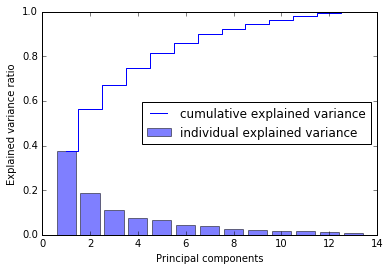

In [8]:
#固有値の合計
tot = sum(eigen_vals)
#分散説明理を計算
var_exp = [(i / tot) for i in sorted(eigen_vals,reverse=True)]
#分散説明率の累積和を取得
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt
%matplotlib inline

#分散説明率の棒グラフを生成
plt.bar(range(1,14),var_exp,alpha=0.5,align='center',label='individual explained variance')
#分散説明率の累積和の階段グラフを作成
plt.step(range(1,14),cum_var_exp,where='mid',label='cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.ylim([0,1])
plt.show()

- 1つ目の主成分だけで分散の40%近くを占めている事がわかる。また、最初の２つの主成分を合わせると、分散の60%近くになることもわかる
- なお、このグラフはクラスラベルに関する情報は使用していない。
- 主成分分析で計算される分散は特徴量の軸に沿った値の散らばりを計算する。

# 5.1.2 特徴変換
- wineデータ・セットを新しい主成分軸に変換する。
- 固有値の大きいものから順に並び替え、選択された固有ベクトルから射影行列を計算する。
- この射影行列を使ってデータをより低い次元の部分空間に射影する

In [11]:
#（固有値、固有ベクトル）のタプルのリストを作成
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
#(固有値,固有ベクトル)のタプルを大きいもの順に並び替え
eigen_pairs.sort(reverse=True)

- ここでは上位２つの固有ベクトルを利用するが、一般的には計算効率と分類器の性能のバランスを見ながら、主成分の個数を決定する必要がある。

In [14]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))
print 'Matrix W:\n%s' %w

Matrix W:
[[-0.14669811  0.50417079]
 [ 0.24224554  0.24216889]
 [ 0.02993442  0.28698484]
 [ 0.25519002 -0.06468718]
 [-0.12079772  0.22995385]
 [-0.38934455  0.09363991]
 [-0.42326486  0.01088622]
 [ 0.30634956  0.01870216]
 [-0.30572219  0.03040352]
 [ 0.09869191  0.54527081]
 [-0.30032535 -0.27924322]
 [-0.36821154 -0.174365  ]
 [-0.29259713  0.36315461]]


- 射影行列Wを使ってサンプルxをPCAの部分空間に変換し、２つの新しい特徴量からなる２次元のサンプルベクトルx'を生成できる
$$\vec{x^{'}} = \vec{x}\vec{W}$$

In [21]:
X_train_std[0].dot(w)

array([-2.59891628,  0.00484089])

In [22]:
X_train_pca = X_train_std.dot(w)

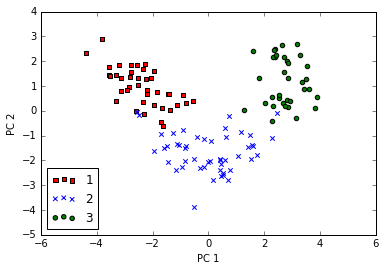

In [24]:
#二次元の散布図にプロット
colors = ['r','b','g']
markers = ['s','x','o']
#「クラスラベル」、「点の色」、「点の種類」の組み合わせからなるリストを生成してプロット
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1],c=c,label=l,marker=m)
    
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

- データは２つ目の主成分であるy軸よりも１つ目の主成分であるx軸沿いに広がっている。

# 5.1.3
- PCAはsklearnの変換器クラスの１つである。

In [33]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):
    
    #マーカとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','grey','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域のプロット
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    
    #グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    #各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    #グリッドポイントの等高線のプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    #軸の範囲の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルをプロット
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)

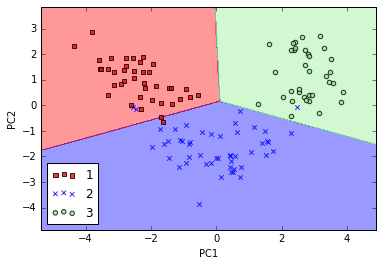

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
#主成分数を指定して、PCAのインスタンスを生成
pca = PCA(n_components=2)
#ロジスティック回帰のインスタンスを生成
lr = LogisticRegression()
#トレーニングデータやテストデータをPCAに適合させる
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
#トレーニングデータをロジスティック回帰に適合させる
lr.fit(X_train_pca,y_train)
#決定境界をプロット
plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

- 固有ベクトルの符号が固有値ゾルバに依存して負または正のどちらかになる。これは大きな問題ではなく、必要に応じて-1をかけて左右対象の図を反転させれば良い。
- テストデータに対するロジスティック回帰の決定領域をプロットして、これらのクラスをうまく分割できるかどうか確かめる。

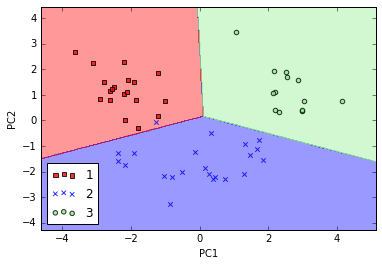

In [39]:
#決定強化をプッロト
plot_decision_regions(X_test_pca,y_test,classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

- テストデータセットの１つだけご分類されている。
- すべての主成分の分散説明率に関心がある場合は、n_componentsをNoneにして、explained_variance_ratio_属性で取得する

In [40]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
#分散説明率を計算
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])